### Code Overview:

This Jupyter Notebook contains code for wildfire prediction using machine learning algorithms. The dataset used for training and testing the models is sourced from Kaggle. You can find the dataset [here](https://www.kaggle.com/datasets/abdelghaniaaba/wildfire-prediction-dataset/data).

**This code aims to develop machine learning models for predicting wildfires based on image data. The workflow involves:**

- **Loading and Preprocessing Images**: Images from designated folders are loaded and resized to a common dimension to prepare them for input into machine learning models. The images are categorized into "nowildfire" and "wildfire" classes.
  
- **Data Splitting**: The dataset is divided into three parts: training, validation, and test sets. The training set is used to train the models, the validation set is used to optimize model parameters and evaluate performance during training, and the test set is used to assess the final performance of trained models on unseen data.

- **Data Visualization**: Random samples from each dataset are displayed for visual inspection, helping to understand the nature of the images and the distribution of classes within the dataset.

- **Model Training and Evaluation**: Various machine learning models, including Random Forest, Naive Bayes, SVM, Logistic Regression, and Linear Regression, are trained using the training dataset. The models are then evaluated on the validation and test sets using accuracy metrics and classification reports to determine their effectiveness in predicting wildfires.

- **Output Interpretation**: The code prints out accuracy scores and classification reports for each model, providing insights into their performance in classifying images as either "nowildfire" or "wildfire."


Importing Libraries:

Import necessary libraries including classifiers, metrics, file handling, image processing, and plotting libraries.

In [51]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression

Setting Up:

Set up the current working directory and define image dimensions and sample size for image loading and preprocessing.

In [52]:
# Define paths to the dataset
base_dir = os.getcwd()  # Get the current working directory

# Define image dimensions
img_width, img_height = 350, 350

# Define the number of samples to take from each class and each dataset
sample_size = 50

Loading and Preprocessing Images:

Define a function to load and preprocess images from specified folders.
Load and preprocess sampled images from the train, validation, and test datasets.
Display random sample images from each dataset.

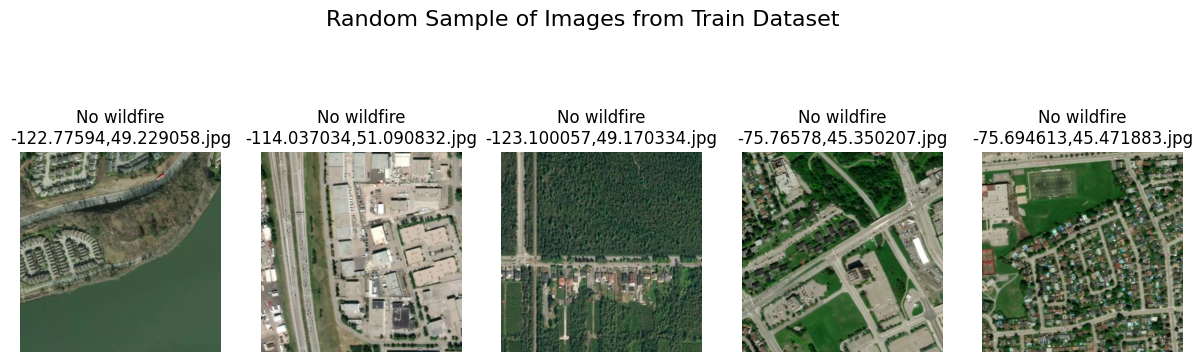

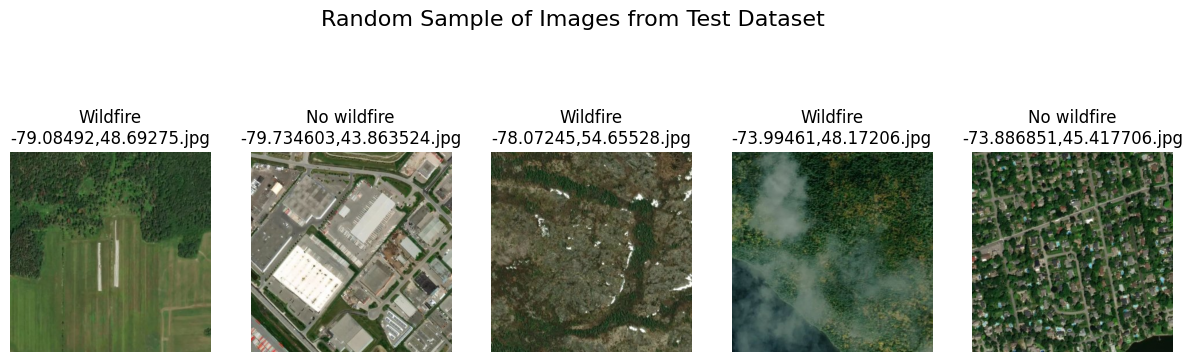

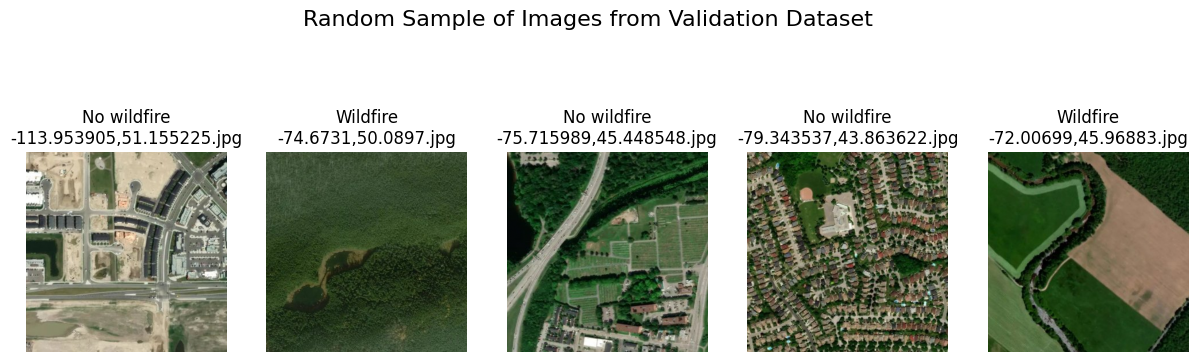

In [54]:
# Load and preprocess sampled images from a folder
def load_images_from_folder(folder):
    images = []
    labels = []
    filenames = []
    for label, class_folder in enumerate(['nowildfire', 'wildfire']):
        class_path = os.path.join(folder, class_folder)
        class_filenames = np.random.choice(os.listdir(class_path), size=sample_size, replace=False)
        for filename in class_filenames:
            img_path = os.path.join(class_path, filename)
            image = imread(img_path)
            image = resize(image, (img_width, img_height))
            images.append(image.flatten())  # flatten image to 1D array
            labels.append(label)
            filenames.append(filename)
    return np.array(images), np.array(labels), filenames

# Load and preprocess sampled images from the train, valid, and test datasets
train_dir = os.path.join(base_dir, "train")
X_train, y_train, train_filenames = load_images_from_folder(train_dir)
valid_dir = os.path.join(base_dir, "valid")
X_valid, y_valid, valid_filenames = load_images_from_folder(valid_dir)
test_dir = os.path.join(base_dir, "test")
X_test, y_test, test_filenames = load_images_from_folder(test_dir)

# Display random sample images from each dataset
def display_random_images(images, labels, filenames, dataset_name):
    plt.figure(figsize=(15, 5))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        rand_index = np.random.randint(len(images))
        image = images[rand_index].reshape((img_width, img_height, -1))  # Reshape to original dimensions
        plt.imshow(image)
        if labels[rand_index] == 0:
            plt.title(f"No wildfire\n{filenames[rand_index]}")
        else:
            plt.title(f"Wildfire\n{filenames[rand_index]}")
        plt.axis('off')
    plt.suptitle(f"Random Sample of Images from {dataset_name} Dataset", fontsize=16)
    plt.show()

# Display random sample images from the train, valid, and test datasets
display_random_images(X_train, y_train, train_filenames, "Train")
display_random_images(X_test, y_test, test_filenames, "Test")
display_random_images(X_valid, y_valid, valid_filenames, "Validation")

### Machine Learning Methods Description:

1. **Random Forest Classifier**:
   - Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the class that is the mode of the classes (classification) of the individual trees.
   - In the context of wildfire prediction, Random Forest analyzes the features extracted from images to classify whether the image represents a wildfire or not.

2. **Naive Bayes Classifier**:
   - Naive Bayes is a probabilistic classifier based on Bayes' theorem with the "naive" assumption of independence between features.
   - In wildfire prediction, Naive Bayes calculates the probability that an image belongs to a certain class (wildfire or not) based on the probability of observing certain image features.

3. **Support Vector Machine (SVM)**:
   - SVM is a supervised learning model used for classification tasks that finds the hyperplane that best separates the classes in the feature space.
   - In wildfire prediction, SVM attempts to find the optimal hyperplane to separate images representing wildfires from those that do not.

4. **Logistic Regression**:
   - Logistic Regression is a linear model used for binary classification tasks that models the probability that an instance belongs to a particular class.
   - In wildfire prediction, Logistic Regression models the probability of an image belonging to the "wildfire" class based on the image features.

5. **Linear Regression**:
   - Linear Regression is a linear approach for modeling the relationship between a dependent variable and one or more independent variables.
   - While not typically used for classification, Linear Regression's predictions could be thresholded to predict the probability of wildfire occurrence.


Random Forest Classifier:

Train a RandomForestClassifier on the training dataset.
Predict on the validation set and calculate accuracy.
Print classification report on the validation set.
Predict on the test set and calculate accuracy.
Print classification report on the test set.

In [55]:
# Define class names
class_names = ['nowildfire', 'wildfire']

# Train a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the validation set
y_valid_pred = rf_classifier.predict(X_valid)

# Calculate accuracy on the validation set
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
print(f"Validation Accuracy: {valid_accuracy:.4f}")

# Classification report on the validation set
print("Classification Report on Validation Set:")
print(classification_report(y_valid, y_valid_pred, target_names=class_names))

# Predict on the test set
y_test_pred = rf_classifier.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Classification report on the test set
print("Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred, target_names=class_names))

Validation Accuracy: 0.8300
Classification Report on Validation Set:
              precision    recall  f1-score   support

  nowildfire       0.87      0.78      0.82        50
    wildfire       0.80      0.88      0.84        50

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100

Test Accuracy: 0.7900
Classification Report on Test Set:
              precision    recall  f1-score   support

  nowildfire       0.77      0.82      0.80        50
    wildfire       0.81      0.76      0.78        50

    accuracy                           0.79       100
   macro avg       0.79      0.79      0.79       100
weighted avg       0.79      0.79      0.79       100



Naive Bayes Classifier:

Train a Gaussian Naive Bayes Classifier on the training dataset.
Predict on the validation set and calculate accuracy.
Print classification report on the validation set.
Predict on the test set and calculate accuracy.
Print classification report on the test set.

In [56]:
# Train a Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predict on the validation set using Naive Bayes
nb_y_valid_pred = nb_classifier.predict(X_valid)

# Calculate accuracy on the validation set using Naive Bayes
nb_valid_accuracy = accuracy_score(y_valid, nb_y_valid_pred)
print(f"Naive Bayes Validation Accuracy: {nb_valid_accuracy:.4f}")

# Classification report on the validation set using Naive Bayes
print("Naive Bayes Classification Report on Validation Set:")
print(classification_report(y_valid, nb_y_valid_pred, target_names=class_names))

# Predict on the test set using Naive Bayes
nb_y_test_pred = nb_classifier.predict(X_test)

# Calculate accuracy on the test set using Naive Bayes
nb_test_accuracy = accuracy_score(y_test, nb_y_test_pred)
print(f"Naive Bayes Test Accuracy: {nb_test_accuracy:.4f}")

# Classification report on the test set using Naive Bayes
print("Naive Bayes Classification Report on Test Set:")
print(classification_report(y_test, nb_y_test_pred, target_names=class_names))

Naive Bayes Validation Accuracy: 0.8800
Naive Bayes Classification Report on Validation Set:
              precision    recall  f1-score   support

  nowildfire       0.91      0.84      0.87        50
    wildfire       0.85      0.92      0.88        50

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100

Naive Bayes Test Accuracy: 0.8600
Naive Bayes Classification Report on Test Set:
              precision    recall  f1-score   support

  nowildfire       0.85      0.88      0.86        50
    wildfire       0.88      0.84      0.86        50

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



Support Vector Machine (SVM) Classifier:

Train a Support Vector Machine (SVM) Classifier with a linear kernel on the training dataset.
Predict on the validation set and calculate accuracy.
Print classification report on the validation set.
Predict on the test set and calculate accuracy.
Print classification report on the test set.

In [57]:
# Train a SVM Classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Predict on the validation set using SVM
svm_y_valid_pred = svm_classifier.predict(X_valid)

# Calculate accuracy on the validation set using SVM
svm_valid_accuracy = accuracy_score(y_valid, svm_y_valid_pred)
print(f"SVM Validation Accuracy: {svm_valid_accuracy:.4f}")

# Classification report on the validation set using SVM
print("SVM Classification Report on Validation Set:")
print(classification_report(y_valid, svm_y_valid_pred, target_names=class_names))

# Predict on the test set using SVM
svm_y_test_pred = svm_classifier.predict(X_test)

# Calculate accuracy on the test set using SVM
svm_test_accuracy = accuracy_score(y_test, svm_y_test_pred)
print(f"SVM Test Accuracy: {svm_test_accuracy:.4f}")

# Classification report on the test set using SVM
print("SVM Classification Report on Test Set:")
print(classification_report(y_test, svm_y_test_pred, target_names=class_names))

SVM Validation Accuracy: 0.8200
SVM Classification Report on Validation Set:
              precision    recall  f1-score   support

  nowildfire       0.97      0.66      0.79        50
    wildfire       0.74      0.98      0.84        50

    accuracy                           0.82       100
   macro avg       0.86      0.82      0.82       100
weighted avg       0.86      0.82      0.82       100

SVM Test Accuracy: 0.7900
SVM Classification Report on Test Set:
              precision    recall  f1-score   support

  nowildfire       0.82      0.74      0.78        50
    wildfire       0.76      0.84      0.80        50

    accuracy                           0.79       100
   macro avg       0.79      0.79      0.79       100
weighted avg       0.79      0.79      0.79       100



Logistic Regression Classifier:

Train a Logistic Regression Classifier on the training dataset.
Predict on the validation set and calculate accuracy.
Print classification report on the validation set.
Predict on the test set and calculate accuracy.
Print classification report on the test set.

Linear Regression Classifier:

Train a Linear Regression Classifier on the training dataset.
Predict on the validation set and calculate accuracy (rounded to the nearest integer).
Predict on the test set and calculate accuracy (rounded to the nearest integer).

In [58]:
# Train a Logistic Regression Classifier
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train, y_train)

# Predict on the validation set using Logistic Regression
logistic_y_valid_pred = logistic_classifier.predict(X_valid)

# Calculate accuracy on the validation set using Logistic Regression
logistic_valid_accuracy = accuracy_score(y_valid, logistic_y_valid_pred)
print(f"Logistic Regression Validation Accuracy: {logistic_valid_accuracy:.4f}")

# Classification report on the validation set using Logistic Regression
print("Logistic Regression Classification Report on Validation Set:")
print(classification_report(y_valid, logistic_y_valid_pred, target_names=class_names))

# Predict on the test set using Logistic Regression
logistic_y_test_pred = logistic_classifier.predict(X_test)

# Calculate accuracy on the test set using Logistic Regression
logistic_test_accuracy = accuracy_score(y_test, logistic_y_test_pred)
print(f"Logistic Regression Test Accuracy: {logistic_test_accuracy:.4f}")

# Classification report on the test set using Logistic Regression
print("Logistic Regression Classification Report on Test Set:")
print(classification_report(y_test, logistic_y_test_pred, target_names=class_names))

# Train a Linear Regression Classifier
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Predict on the validation set using Linear Regression
linear_y_valid_pred = linear_regression.predict(X_valid)

# Calculate accuracy on the validation set using Linear Regression
linear_valid_accuracy = accuracy_score(y_valid, np.round(linear_y_valid_pred))
print(f"Linear Regression Validation Accuracy: {linear_valid_accuracy:.4f}")

# Train a Linear Regression Classifier
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Predict on the test set using Linear Regression
linear_y_test_pred = linear_regression.predict(X_test)

# Calculate accuracy on the test set using Linear Regression
linear_test_accuracy = accuracy_score(y_test, np.round(linear_y_test_pred))
print(f"Linear Regression Test Accuracy: {linear_test_accuracy:.4f}")

c:\users\euvghad\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Validation Accuracy: 0.7500
Logistic Regression Classification Report on Validation Set:
              precision    recall  f1-score   support

  nowildfire       0.93      0.54      0.68        50
    wildfire       0.68      0.96      0.79        50

    accuracy                           0.75       100
   macro avg       0.80      0.75      0.74       100
weighted avg       0.80      0.75      0.74       100

Logistic Regression Test Accuracy: 0.7900
Logistic Regression Classification Report on Test Set:
              precision    recall  f1-score   support

  nowildfire       0.91      0.64      0.75        50
    wildfire       0.72      0.94      0.82        50

    accuracy                           0.79       100
   macro avg       0.82      0.79      0.79       100
weighted avg       0.82      0.79      0.79       100

Linear Regression Validation Accuracy: 0.8000
Linear Regression Test Accuracy: 0.7700
